# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kinmparana
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | khandyga
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | ujae
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | akrehamn
Processing Record 13 of Set 1 | ziro
Processing Record 14 of Set 1 | puerto ayacucho
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | jamsa
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | odienne
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | hammerfest
Processing Record 22 of Set 1 | krasnoarmeysk
Processing Record 23 

Processing Record 39 of Set 4 | flying fish cove
Processing Record 40 of Set 4 | przasnysz
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | ahwa
Processing Record 43 of Set 4 | kiruna
Processing Record 44 of Set 4 | richards bay
Processing Record 45 of Set 4 | enewetak
Processing Record 46 of Set 4 | taiohae
City not found. Skipping...
Processing Record 47 of Set 4 | barranca
Processing Record 48 of Set 4 | krasnovishersk
Processing Record 49 of Set 4 | remire-montjoly
Processing Record 0 of Set 5 | ust-nera
Processing Record 1 of Set 5 | vorgashor
Processing Record 2 of Set 5 | pangai
Processing Record 3 of Set 5 | mirnyy
Processing Record 4 of Set 5 | ilomantsi
Processing Record 5 of Set 5 | aral
Processing Record 6 of Set 5 | sainte-anne-des-monts
Processing Record 7 of Set 5 | charleston
Processing Record 8 of Set 5 | kedrovyy
Processing Record 9 of Set 5 | khanty-mansiysk
Processing Record 10 of Set 5 | port isabel
Processing Record 11 of Set 5 | homer
Processi

Processing Record 31 of Set 8 | ayaviri
Processing Record 32 of Set 8 | badger
Processing Record 33 of Set 8 | castillos
Processing Record 34 of Set 8 | illapel
Processing Record 35 of Set 8 | puerto deseado
Processing Record 36 of Set 8 | murrells inlet
Processing Record 37 of Set 8 | tatarsk
Processing Record 38 of Set 8 | berbera
Processing Record 39 of Set 8 | illizi
Processing Record 40 of Set 8 | tarumovka
Processing Record 41 of Set 8 | luderitz
Processing Record 42 of Set 8 | ozimek
Processing Record 43 of Set 8 | palasa
Processing Record 44 of Set 8 | anton lizardo
Processing Record 45 of Set 8 | ponta delgada
Processing Record 46 of Set 8 | minas de marcona
Processing Record 47 of Set 8 | qaqortoq
Processing Record 48 of Set 8 | norrtalje
Processing Record 49 of Set 8 | labuan
Processing Record 0 of Set 9 | caykara
Processing Record 1 of Set 9 | kuraymah
Processing Record 2 of Set 9 | mangalia
Processing Record 3 of Set 9 | mukalla
Processing Record 4 of Set 9 | tobi village


Processing Record 21 of Set 12 | talara
Processing Record 22 of Set 12 | savave village
City not found. Skipping...
Processing Record 23 of Set 12 | benguela
Processing Record 24 of Set 12 | kismayo
Processing Record 25 of Set 12 | kill devil hills
Processing Record 26 of Set 12 | maumere
Processing Record 27 of Set 12 | bushland beach
City not found. Skipping...
Processing Record 28 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 29 of Set 12 | gedo
Processing Record 30 of Set 12 | male
Processing Record 31 of Set 12 | severnoye
Processing Record 32 of Set 12 | undurkhaan
Processing Record 33 of Set 12 | fort bragg
Processing Record 34 of Set 12 | boca do acre
Processing Record 35 of Set 12 | kogalym
Processing Record 36 of Set 12 | ola
Processing Record 37 of Set 12 | shihezi
Processing Record 38 of Set 12 | corner brook
Processing Record 39 of Set 12 | elliot lake
Processing Record 40 of Set 12 | douz
Processing Record 41 of Set 12 | pingliang
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kinmparana,12.8402,-4.9199,83.57,62,100,9.42,ML,1690576246
1,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,100,75,8.95,RU,1690576247
2,invercargill,-46.4000,168.3500,44.02,89,100,1.01,NZ,1690576247
3,ilulissat,69.2167,-51.1000,42.82,93,75,3.44,GL,1690576248
4,papatowai,-46.5619,169.4708,45.05,69,100,5.44,NZ,1690576248


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kinmparana,12.8402,-4.9199,83.57,62,100,9.42,ML,1690576246
1,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,100,75,8.95,RU,1690576247
2,invercargill,-46.4000,168.3500,44.02,89,100,1.01,NZ,1690576247
3,ilulissat,69.2167,-51.1000,42.82,93,75,3.44,GL,1690576248
4,papatowai,-46.5619,169.4708,45.05,69,100,5.44,NZ,1690576248


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

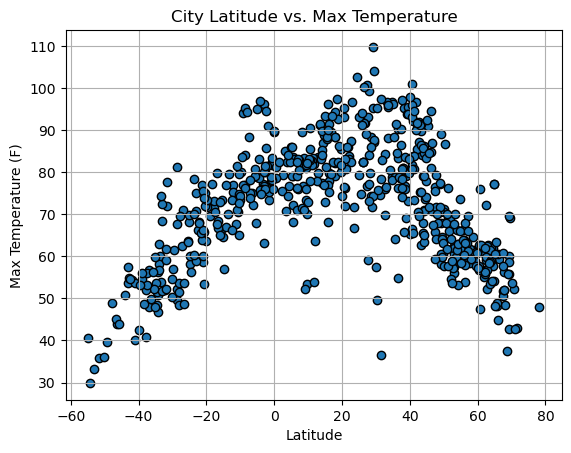

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temperature = city_data_df['Max Temp']
plt.scatter(latitude, max_temperature, edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

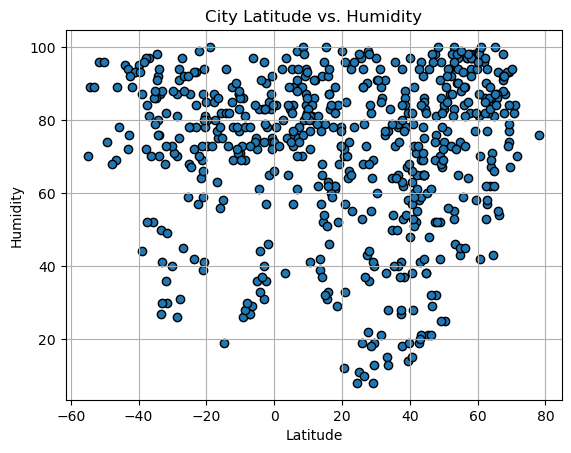

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity,edgecolors='black' )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

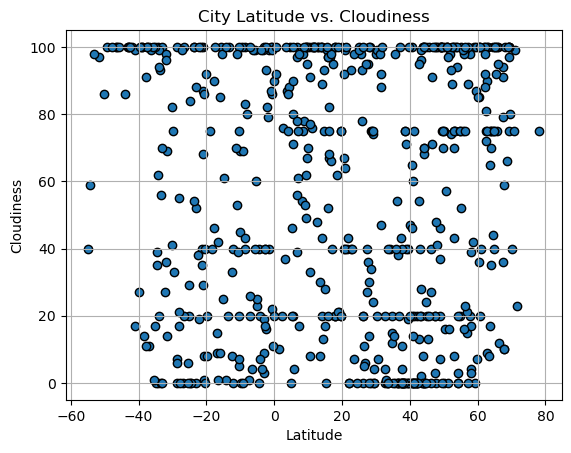

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness ,edgecolors='black' )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

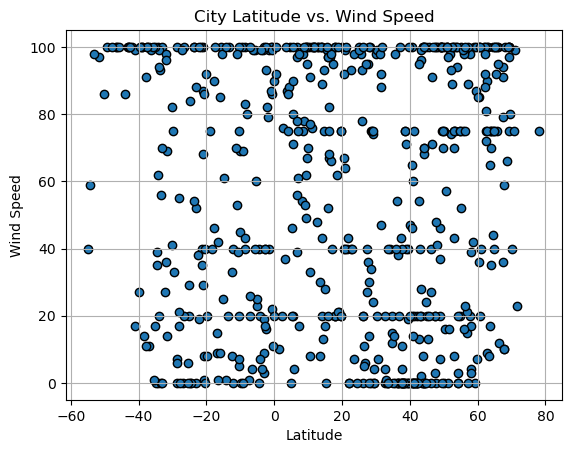

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, cloudiness ,edgecolors='black' )

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(text_coordinates),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kinmparana,12.8402,-4.9199,83.57,62,100,9.42,ML,1690576246
1,petropavlovsk-kamchatsky,53.0452,158.6483,55.99,100,75,8.95,RU,1690576247
3,ilulissat,69.2167,-51.1000,42.82,93,75,3.44,GL,1690576248
5,khandyga,62.6667,135.6000,57.07,57,90,1.95,RU,1690576249
6,nemuro,43.3236,145.5750,62.78,96,96,4.65,JP,1690576249


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,44.02,89,100,1.01,NZ,1690576247
4,papatowai,-46.5619,169.4708,45.05,69,100,5.44,NZ,1690576248
9,port-aux-francais,-49.3500,70.2167,39.58,74,100,25.70,TF,1690576251
16,ancud,-41.8697,-73.8203,54.36,89,100,27.49,CL,1690576254
18,hermanus,-34.4187,19.2345,50.81,92,100,24.61,ZA,1690576255


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5989339020236008


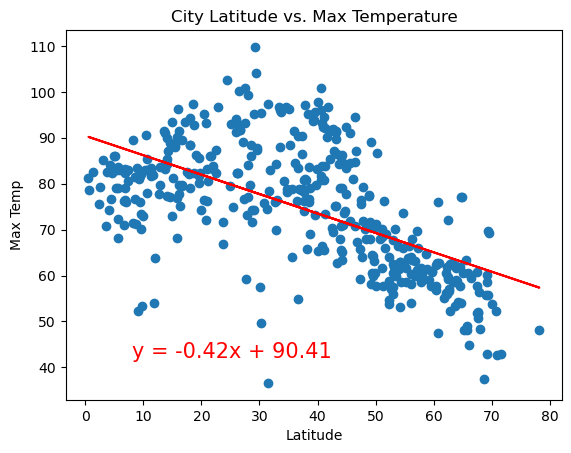

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Max Temperature', (8,42), 
                      'Latitude', 'Max Temp')


The r-value is: 0.8527692077201738


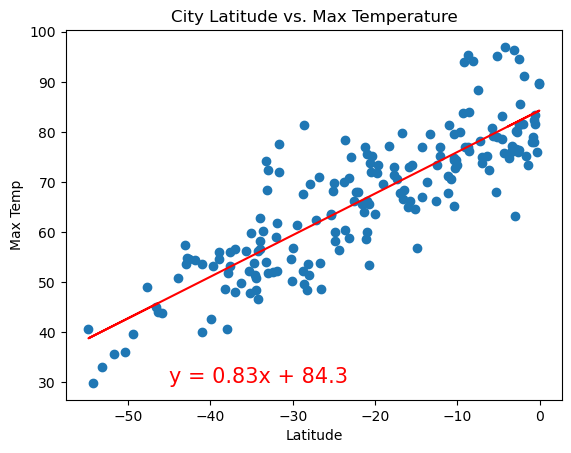

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Max Temperature', (-45,30),
                      'Latitude', 'Max Temp')

**Discussion about the linear relationship:** There appears to be a linear relationship for both the Northern and Southern
hempispheres. As we go further north, the max temperature drops, this makes sense because we are going away from the 
equator, where the temperature is normally higher. This is indciated by the low r-value, -59. The opposite is true for the Southern hemisphere. The further south we go, away from the equator, the temperature drops. We have an even higher r-value here, .85. The reason this is positive, is because the graph starts out farthest from the equator and goes closer. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09721201132861056


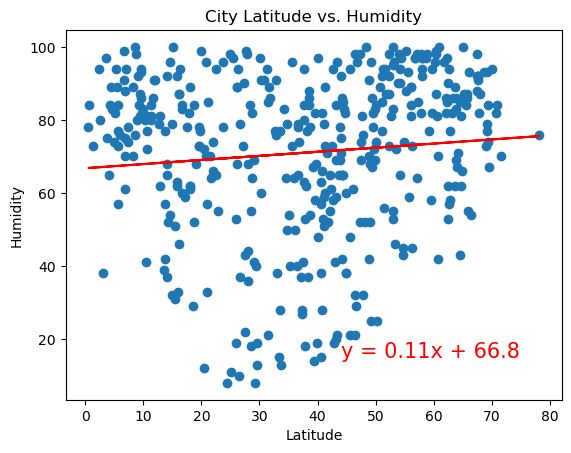

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Humidity', (44,15),
                      'Latitude', 'Humidity')

The r-value is: -0.1892561702207288


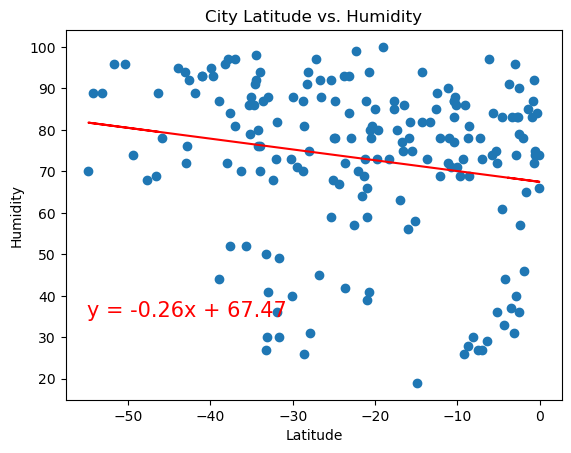

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Humidity', (-55,35),
                      'Latitude', 'Humidity')

**Discussion about the linear relationship:** Both r-values here are small, which shows that there is no relationship between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.001112491513726638


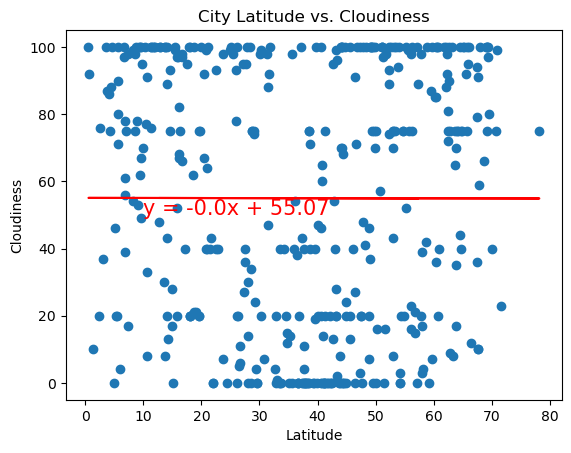

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Cloudiness', (10,50),
                      'Latitude', 'Cloudiness')

The r-value is: -0.17750111052260348


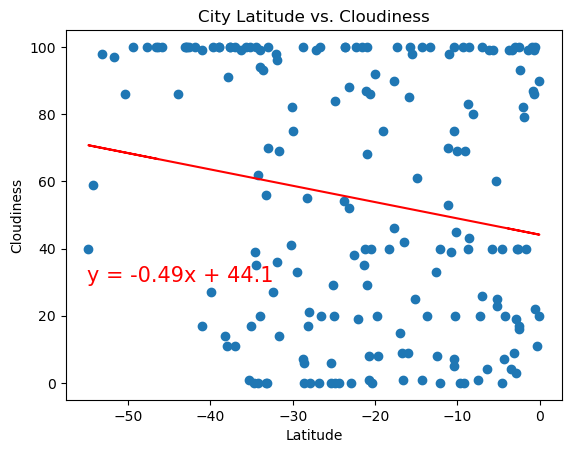

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Cloudiness', (-55,30),
                      'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Again, both r-values are small, so no linear relationship between cloudiness and latitude. When you look at each graph, the regression line has poor fit. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.20420036163550861


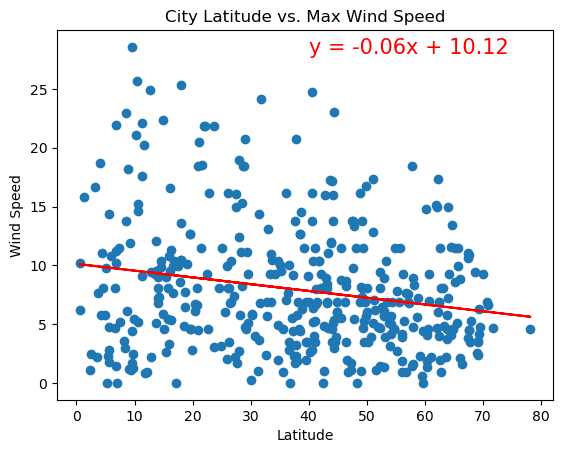

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Max Wind Speed', (40,28), 
                      'Latitude', 'Wind Speed')

The r-value is: -0.08220491963406593


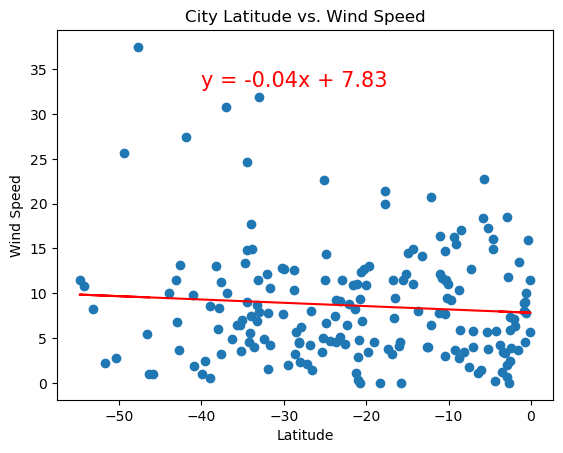

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'City Latitude vs. Wind Speed', (-40,33),
                      'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Looking at each graph, the regression lines do not have a good fit, and the r-values confirm that there is no a signifcant linear relationship between latitude and wind speed. 